🟡 Welcome to Gold Price Prediction System

Choose a prediction mode:
1️⃣ Predict gold price using SPX, USO, SLV, and EUR/USD (Linear Regression)
2️⃣ Predict gold price for a specific future date (ARIMA time-series)

Enter your choice (1 or 2): 2

📗 Selected: ARIMA Time-Series Model (2015–2025 dataset)

✅ Dataset Loaded Successfully: (2848, 6)
            Price   Open   High    Low  Volume  Chg%
Date                                                
2014-01-01  29542  29435  29598  29340    2930  0.25
2014-01-02  29975  29678  30050  29678    3140  1.47
2014-01-03  29727  30031  30125  29539    3050 -0.83
2014-01-04  29279  29279  29279  29279       0 -1.51
2014-01-06  29119  29300  29395  29051   24380 -0.55


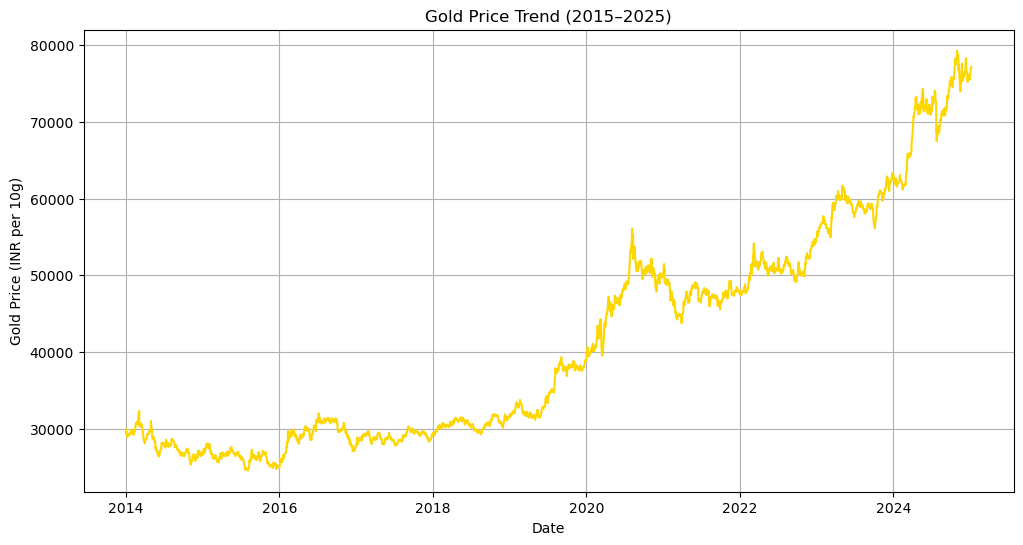

🔍 Finding best ARIMA parameters...
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.02 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=43660.526, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=42713.845, Time=0.23 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=43658.527, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=42413.621, Time=0.44 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=42271.941, Time=0.53 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=42188.071, Time=0.58 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=42131.534, Time=1.34 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.70 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.27 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=42129.518, Time=0.42 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=42186.055, Time=0.33 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=3.82 sec
 ARIMA(4,2,1)(

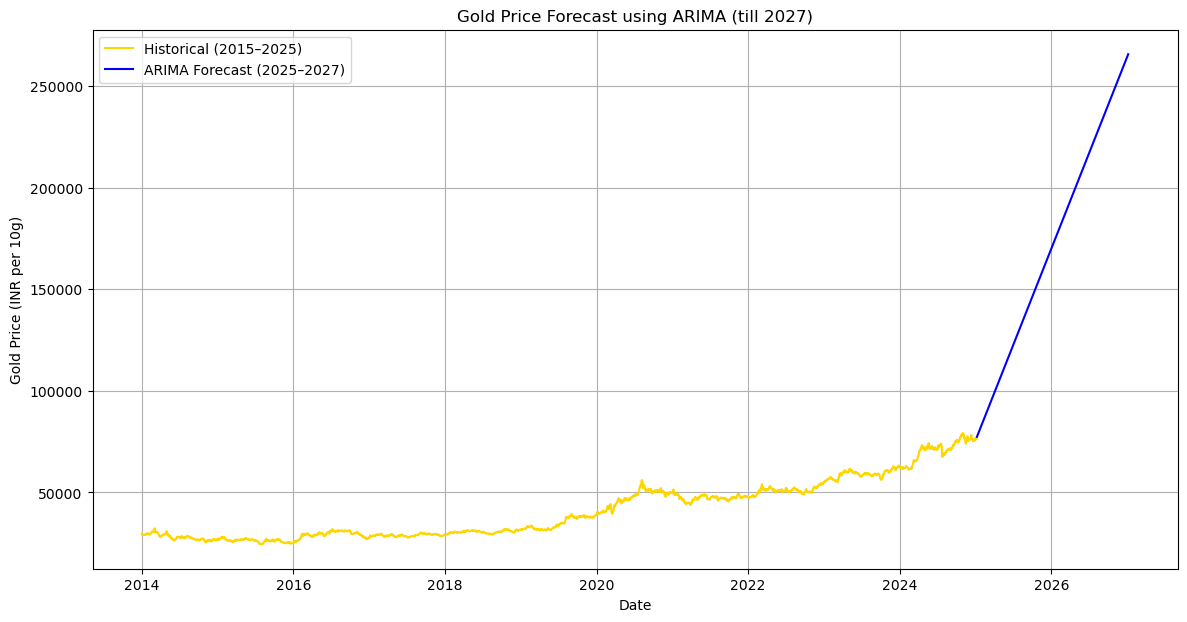


Enter a future date (between 2025–2027) to predict gold price:
Date (YYYY-MM-DD): 2026-10-11

💰 Predicted Gold Price on 2026-10-11: ₹243195.50


OSError: Cannot save file into a non-existent directory: '..\forecast_results'

In [4]:
# -------------------------------------------------------------
# 🪙 Gold Price Prediction System
# -------------------------------------------------------------
# Combines:
# 1️⃣ Linear Regression (Market indicators: SPX, USO, SLV, EUR/USD)
# 2️⃣ ARIMA (Time Series Forecast till 2027)
# -------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

# -------------------------------------------------------------
# Step 1: Ask User for Prediction Type
# -------------------------------------------------------------
print("🟡 Welcome to Gold Price Prediction System\n")
print("Choose a prediction mode:")
print("1️⃣ Predict gold price using SPX, USO, SLV, and EUR/USD (Linear Regression)")
print("2️⃣ Predict gold price for a specific future date (ARIMA time-series)")
choice = input("\nEnter your choice (1 or 2): ")

# -------------------------------------------------------------
# -------------- OPTION 1: LINEAR REGRESSION ------------------
# -------------------------------------------------------------
if choice == "1":
    print("\n📘 Selected: Linear Regression Model (2008–2018 dataset)\n")

    # Step 1: Load Dataset
    data = pd.read_csv("../data/gold_price_data.csv")  # 2008–2018 dataset
    data.dropna(inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values(by='Date')
    print("✅ Dataset Loaded Successfully!")

    # Step 2: Visualize
    plt.figure(figsize=(10,5))
    plt.plot(data['Date'], data['GLD'], color='gold')
    plt.title("Gold Price Trend (2008–2018)")
    plt.xlabel("Date")
    plt.ylabel("Gold ETF Price (GLD)")
    plt.grid(True)
    plt.show()

    # Step 3: Correlation Analysis
    plt.figure(figsize=(8,6))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title("Feature Correlation Heatmap")
    plt.show()

    # Step 4: Define X and y
    X = data[['SPX', 'USO', 'SLV', 'EUR/USD']]
    y = data['GLD']

    # Step 5: Split and Train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Step 6: Predictions and Metrics
    y_pred = lr.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print("\n📊 Linear Regression Model Evaluation")
    print(f"MAE  : {mae:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"R²   : {r2:.3f}")

    # Step 7: Actual vs Predicted Plot
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, color='orange')
    plt.xlabel("Actual Gold Prices")
    plt.ylabel("Predicted Gold Prices")
    plt.title("Actual vs Predicted Gold Prices (Linear Regression)")
    plt.grid(True)
    plt.show()

    # Step 8: Save Model
    with open("../models/linear_regression_model.pkl", "wb") as file:
        pickle.dump(lr, file)
    print("✅ Linear Regression Model Saved Successfully!")

    # Step 9: Predict using User Input
    print("\nEnter market indicator values to predict gold price:")
    spx = float(input("SPX: "))
    uso = float(input("USO: "))
    slv = float(input("SLV: "))
    eur = float(input("EUR/USD: "))

    sample_input = np.array([[spx, uso, slv, eur]])
    predicted_price = lr.predict(sample_input)
    print(f"\n💰 Predicted Gold Price based on input values: ₹{predicted_price[0]:.2f}")

# -------------------------------------------------------------
# ------------------- OPTION 2: ARIMA MODEL -------------------
# -------------------------------------------------------------
elif choice == "2":
    print("\n📗 Selected: ARIMA Time-Series Model (2015–2025 dataset)\n")

    # Step 1: Load Dataset
    data = pd.read_csv('../data/daily_gold_2015_2025.csv')
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    data = data.sort_index()

    print("✅ Dataset Loaded Successfully:", data.shape)
    print(data.head())

    # Step 2: Visualize
    plt.figure(figsize=(12,6))
    plt.plot(data['Price'], color='gold')
    plt.title("Gold Price Trend (2015–2025)")
    plt.xlabel("Date")
    plt.ylabel("Gold Price (INR per 10g)")
    plt.grid(True)
    plt.show()

    # Step 3: Fit ARIMA
    print("🔍 Finding best ARIMA parameters...")
    auto_model = auto_arima(data['Price'], seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
    print("\n✅ Best ARIMA order found:", auto_model.order)

    model = ARIMA(data['Price'], order=auto_model.order)
    model_fit = model.fit()
    print(model_fit.summary())

    # Step 4: Forecast till 2027
    forecast_steps = 730
    forecast = model_fit.forecast(steps=forecast_steps)
    last_date = data.index[-1]
    future_dates = pd.date_range(start=last_date, periods=forecast_steps+1, freq='D')[1:]
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Price': forecast}).set_index('Date')

    # Step 5: Plot Forecast
    plt.figure(figsize=(14,7))
    plt.plot(data['Price'], label='Historical (2015–2025)', color='gold')
    plt.plot(forecast_df['Forecasted_Price'], label='ARIMA Forecast (2025–2027)', color='blue')
    plt.title("Gold Price Forecast using ARIMA (till 2027)")
    plt.xlabel("Date")
    plt.ylabel("Gold Price (INR per 10g)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 6: Predict Gold Price for Specific Date
    print("\nEnter a future date (between 2025–2027) to predict gold price:")
    user_date = input("Date (YYYY-MM-DD): ")
    user_date = pd.to_datetime(user_date)

    if user_date in forecast_df.index:
        predicted_price = forecast_df.loc[user_date, 'Forecasted_Price']
        print(f"\n💰 Predicted Gold Price on {user_date.date()}: ₹{predicted_price:.2f}")
    else:
        print("⚠️ The entered date is beyond forecast range (2025–2027).")

    # Step 7: Save Forecast
    forecast_df.to_csv('../forecast_results/arima_forecast_combined.csv')
    print("\n✅ ARIMA Forecast Saved Successfully!")

# -------------------------------------------------------------
# ------------------- INVALID CHOICE --------------------------
# -------------------------------------------------------------
else:
    print("❌ Invalid choice! Please run again and select 1 or 2.")
